In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [159]:
df = pd.read_csv(r"C:\Users\Surface Pro\Downloads\archive (1)\business.csv")

In [160]:
print(df.shape)

(93487, 11)


In [161]:
print(df.shape)

(93487, 11)


In [162]:
print(df.shape)

(93487, 11)


In [163]:
print(df.columns)

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')


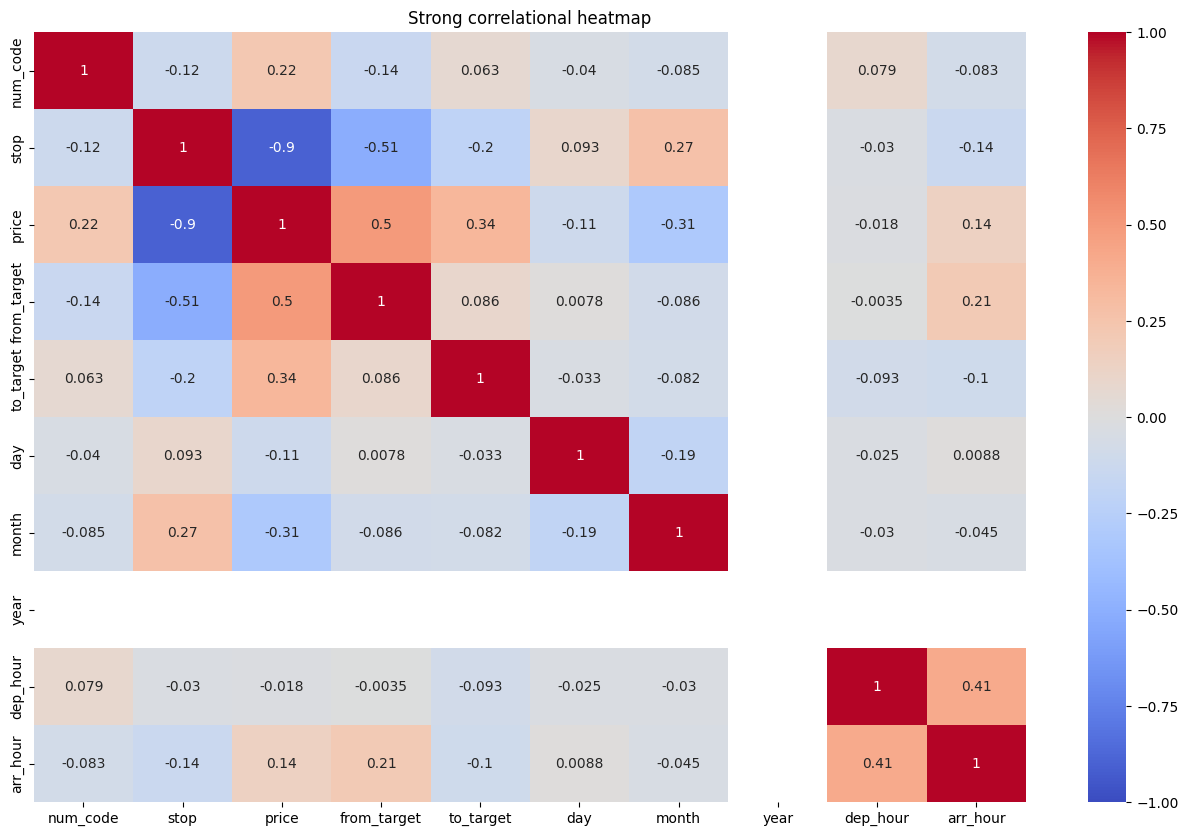

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize= (16,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Strong correlational heatmap")
plt.show()

In [164]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB
None


In [165]:
print(df.isnull().sum())

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64


In [166]:
print(df.head())

         date    airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  Air India      AI       868    18:00  Delhi    02h 00m   
1  11-02-2022  Air India      AI       624    19:00  Delhi    02h 15m   
2  11-02-2022  Air India      AI       531    20:00  Delhi    24h 45m   
3  11-02-2022  Air India      AI       839    21:25  Delhi    26h 30m   
4  11-02-2022  Air India      AI       544    17:15  Delhi    06h 40m   

                                                stop arr_time      to   price  
0                                          non-stop     20:00  Mumbai  25,612  
1                                          non-stop     21:15  Mumbai  25,612  
2  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:45  Mumbai  42,220  
3  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    23:55  Mumbai  44,450  
4  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    23:55  Mumbai  46,690  


In [167]:
print(df.describe())

           num_code
count  93487.000000
mean     780.056147
std      147.616038
min      401.000000
25%      706.000000
50%      820.000000
75%      874.000000
max      996.000000


In [168]:
print(df.dtypes)

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object


In [169]:
print(df.shape)

(93487, 11)


In [170]:
df.fillna(df.median(numeric_only=True), inplace=True) #handling missing Values

In [171]:
df.drop_duplicates(inplace=True) # Handling duplicates

In [172]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['num_code'], dtype='object')


In [173]:
print(df[['price', 'time_taken']].head())
print(df[['price', 'time_taken']].dtypes)

    price time_taken
0  25,612    02h 00m
1  25,612    02h 15m
2  42,220    24h 45m
3  44,450    26h 30m
4  46,690    06h 40m
price         object
time_taken    object
dtype: object


In [174]:
df['price'] = df['price'].str.replace(',', '').astype(float)

In [175]:
Q1 =df['price'].quantile(0.25)
Q3 =df['price'].quantile(0.75)

In [176]:
IQR = Q3 - Q1
df = df[((df['price'] < (Q1 - 1.5*IQR)) | (df['price'] > (Q3 + 1.5*IQR)))] #handling Outliers

In [177]:
print(df.shape)

(3650, 11)


In [178]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd

In [179]:
X = df.drop('price', axis=1)  
y = df['price']  
numerical_features = ['num_code', 'stop', 'from_target', 'to_target']
categorical_features = ['ch_code', 'time_taken', 'from', 'to'] 

In [182]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),           # Scale numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical columns
    ],  remainder='passthrough'  # keep airline_Air India, airline_Vistara
)

In [235]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [243]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [254]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ))
])

In [248]:
xgb_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [183]:
df['stop'] = LabelEncoder().fit_transform(df['stop'])

In [184]:
df = pd.get_dummies(df, columns=['airline'], prefix='airline')

In [185]:
X = df.drop(['price', 'date', 'ch_code', 'dep_time', 'arr_time', 'from', 'to'], axis=1)
X = pd.get_dummies(X, columns=['airline_Air India','airline_Vistara'], drop_first=True)

In [186]:
for col in ['from', 'to']:
    mean_target = df.groupby(col)['price'].mean() 
    df[col + '_target'] = df[col].map(mean_target)

In [187]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Extract numeric features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Drop the original 'date' column since we now have numeric features
df = df.drop(columns=['date'])

# If you have dep_time and arr_time, convert to hours
df['dep_hour'] = pd.to_datetime(df['dep_time'], format='%H:%M', errors='coerce').dt.hour
df['arr_hour'] = pd.to_datetime(df['arr_time'], format='%H:%M', errors='coerce').dt.hour

# Drop the original time columns
df = df.drop(columns=['dep_time', 'arr_time'])

In [188]:
print(df.head())

    ch_code  num_code   from time_taken  stop      to    price  \
121      UK       707  Delhi    26h 50m     5  Mumbai  95657.0   
208      UK       819  Delhi    18h 00m     0  Mumbai  85527.0   
209      UK       705  Delhi    06h 30m     5  Mumbai  86137.0   
210      UK       705  Delhi    13h 50m     5  Mumbai  86137.0   
211      UK       839  Delhi    09h 05m     0  Mumbai  86776.0   

     airline_Air India  airline_Vistara   from_target     to_target  day  \
121              False             True  40127.711111  36476.726592   12   
208              False             True  40127.711111  36476.726592   13   
209              False             True  40127.711111  36476.726592   13   
210              False             True  40127.711111  36476.726592   13   
211              False             True  40127.711111  36476.726592   13   

     month  year  dep_hour  arr_hour  
121      2  2022        17        20  
208      2  2022        14         8  
209      2  2022         6   

In [189]:
print(df.dtypes)

ch_code               object
num_code               int64
from                  object
time_taken            object
stop                   int64
to                    object
price                float64
airline_Air India       bool
airline_Vistara         bool
from_target          float64
to_target            float64
day                    int32
month                  int32
year                   int32
dep_hour               int32
arr_hour               int32
dtype: object


In [190]:
print(df.shape)

(3650, 16)


In [191]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [192]:
def columns_to_scale(df, target_col=None):
    scale_cols = []
    
    for col in df.columns:
        dtype = df[col].dtype
        
        # Skip target
        if col == target_col:
            continue
        
        # Skip boolean/dummy
        if dtype == 'bool':
            continue
        
        # Handle numeric
        if pd.api.types.is_numeric_dtype(dtype):
            # Likely ID-like codes (you decide)
            if 'code' in col.lower():
                print(f"{col} looks like an ID/code. Check if it has numeric meaning before scaling.")
            else:
                scale_cols.append(col)
                
        # Handle object columns that might be times/durations
        elif dtype == 'object' and ('time' in col.lower() or 'duration' in col.lower()):
            print(f"{col} is time/duration. Convert to numeric before scaling.")
    
    return scale_cols

# Run the function
to_scale = columns_to_scale(df, target_col="price")
print("\nColumns recommended for scaling:", to_scale)

num_code looks like an ID/code. Check if it has numeric meaning before scaling.
time_taken is time/duration. Convert to numeric before scaling.

Columns recommended for scaling: ['stop', 'from_target', 'to_target', 'day', 'month', 'year', 'dep_hour', 'arr_hour']


In [193]:
to_scale = ['stop', 'from_target', 'to_target']

In [194]:
scaler = StandardScaler()
df[to_scale] = scaler.fit_transform(df[to_scale])
print(df[to_scale].head())

         stop  from_target  to_target
121  0.127149    -0.279743  -0.740045
208 -1.436509    -0.279743  -0.740045
209  0.127149    -0.279743  -0.740045
210  0.127149    -0.279743  -0.740045
211 -1.436509    -0.279743  -0.740045


In [195]:
from sklearn.model_selection import train_test_split

In [209]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [210]:
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

X_train: (2920, 15)
X_val: (547, 15)
X_test: (730, 15)


In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [212]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}
results = []

1. Linear Regression

I chose Linear Regression because it allows me to predict a continuous target like price using my numeric and encoded features. I like starting with it because it’s simple, interpretable, and helps me understand which features are important. Its main strengths are that it’s fast to train and provides clear coefficients I can analyze. However, I know it won’t capture non-linear relationships unless I transform my features, and it can be sensitive to outliers or correlated variables. I also keep in mind that it assumes a linear relationship between features and the target, constant variance of errors, normally distributed errors, and independent features.

2. Random Forest Regressor

I find Random Forest useful because it can handle numeric, boolean, and encoded categorical features while capturing non-linear relationships automatically. I like that it’s robust to outliers and noise and that I don’t have to scale my data for it to work well. Its main drawback is that it’s harder to interpret than Linear Regression, and it can be computationally heavier for large datasets like mine. I don’t have to worry about linearity assumptions because Random Forest learns patterns through decision tree splits, which is perfect for the complex relationships in my flight price data.

3. Gradient Boosting Regressor (XGBoost, LightGBM)

I use Gradient Boosting because it often gives me higher accuracy than Random Forest. It works by learning sequentially from errors, which helps me capture very complex patterns in flight prices. I like that it can handle missing values and mixed types of features. However, I know it can be slower to train and sensitive to hyperparameters like learning rate and tree depth, so I need to tune it carefully. The main assumption I keep in mind is that my target can be approximated as a combination of decision trees, where each tree improves on the previous one.

In [213]:
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['ch_code', 'from', 'time_taken', 'to'], dtype='object')


In [214]:
print(df.columns.tolist())

['ch_code', 'num_code', 'from', 'time_taken', 'stop', 'to', 'price', 'airline_Air India', 'airline_Vistara', 'from_target', 'to_target', 'day', 'month', 'year', 'dep_hour', 'arr_hour']


In [215]:
print(df.dtypes)

ch_code               object
num_code               int64
from                  object
time_taken            object
stop                 float64
to                    object
price                float64
airline_Air India       bool
airline_Vistara         bool
from_target          float64
to_target            float64
day                    int32
month                  int32
year                   int32
dep_hour               int32
arr_hour               int32
dtype: object


In [216]:
print("Current columns in df:", X.columns.tolist())

Current columns in df: ['ch_code', 'num_code', 'from', 'time_taken', 'stop', 'to', 'airline_Air India', 'airline_Vistara', 'from_target', 'to_target', 'day', 'month', 'year', 'dep_hour', 'arr_hour']


In [217]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    print(f"{name} trained successfully! Predictions shape: {y_pred.shape}")

Linear Regression trained successfully! Predictions shape: (547,)
Random Forest trained successfully! Predictions shape: (547,)
XGBoost trained successfully! Predictions shape: (547,)


In [218]:
print(X_test.isnull().sum())
print(y_test.isnull().sum())

ch_code              0
num_code             0
from                 0
time_taken           0
stop                 0
to                   0
airline_Air India    0
airline_Vistara      0
from_target          0
to_target            0
day                  0
month                0
year                 0
dep_hour             0
arr_hour             0
dtype: int64
0


In [238]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    
    non_zero_idx = y_true != 0
    if np.any(non_zero_idx):
        mape = np.mean(np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])) * 100
    else:
        mape = np.nan
 
    print(f"--- {model_name} ---")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%\n")

In [239]:
y_pred_lr = lr_pipeline.predict(X_test)

In [240]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")

--- Linear Regression ---
MAE: 2250.51
MSE: 19513405.98
RMSE: 4417.40
R2 Score: 0.9819
MAPE: 4.24%



In [244]:
y_pred_rf = rf_pipeline.predict(X_test)

In [245]:
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Random Forest ---
MAE: 1475.61
MSE: 12311041.57
RMSE: 3508.71
R2 Score: 0.9886
MAPE: 1.79%



In [249]:
y_pred_xgb = xgb_pipeline.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost")

--- XGBoost ---
MAE: 1595.61
MSE: 12540605.43
RMSE: 3541.27
R2 Score: 0.9884
MAPE: 2.20%



In [256]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

In [257]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.7, 0.8, 1.0]
}


In [259]:
grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    cv=5,             
    scoring='r2',      
    verbose=2,
    n_jobs=-1
)

In [260]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'model__learning_rate': [0.01, 0.1, ...], 'model__max_depth': [3, 5, ...], 'model__n_estimators': [100, 200, ...], 'model__subsample': [0.7, 0.8, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [261]:
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__subsample': 0.7}
Best R2 Score: 0.9851621121772292


In [262]:
y_pred_best_xgb = grid_search.predict(X_test)
evaluate_model(y_test, y_pred_best_xgb, "Tuned XGBoost")

--- Tuned XGBoost ---
MAE: 1591.93
MSE: 12322079.82
RMSE: 3510.28
R2 Score: 0.9886
MAPE: 2.23%



In [263]:
import pandas as pd

# Metrics before tuning
before_tuning = {
    'MAE': 1595.61,
    'MSE': 12540605.43,
    'RMSE': 3541.27,
    'R2': 0.9884,
    'MAPE': 2.20
}

# Metrics after tuning
after_tuning = {
    'MAE': 1591.93,
    'MSE': 12322079.82,
    'RMSE': 3510.28,
    'R2': 0.9886,
    'MAPE': 2.23
}

# Create DataFrame for comparison
comparison_df = pd.DataFrame([before_tuning, after_tuning], index=['Before Tuning', 'After Tuning'])
comparison_df


,MAE,MSE,RMSE,R2,MAPE
Before Tuning,1595.61,12540605.43,3541.27,0.9884,2.20
After Tuning,1591.93,12322079.82,3510.28,0.9886,2.23


In [264]:
# Default parameters (before tuning)
default_params = {
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 3,
    'subsample': 1
}

# Tuned parameters (after tuning)
tuned_params = {
    'learning_rate': 0.05,
    'n_estimators': 200,
    'max_depth': 5,
    'subsample': 0.8
}

param_df = pd.DataFrame([default_params, tuned_params], index=['Before Tuning', 'After Tuning'])
param_df

,learning_rate,n_estimators,max_depth,subsample
Before Tuning,0.10,100,3,1.0
After Tuning,0.05,200,5,0.8


In [265]:
improvement = {}

for metric in before_tuning.keys():
    # If higher is better (R2), compute percentage increase
    if metric == 'R2':
        improvement[metric] = ((after_tuning[metric] - before_tuning[metric]) / before_tuning[metric]) * 100
    else:  # For error metrics, lower is better, compute percentage decrease
        improvement[metric] = ((before_tuning[metric] - after_tuning[metric]) / before_tuning[metric]) * 100
improvement_df = pd.DataFrame(improvement, index=['Improvement (%)'])
improvement_df

,MAE,MSE,RMSE,R2,MAPE
Improvement (%),0.230633,1.742544,0.87511,0.020235,-1.363636


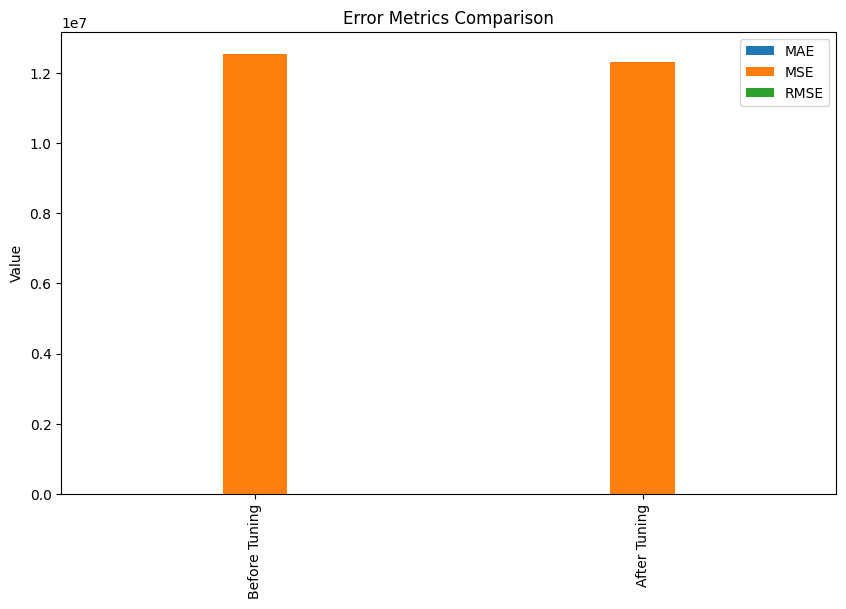

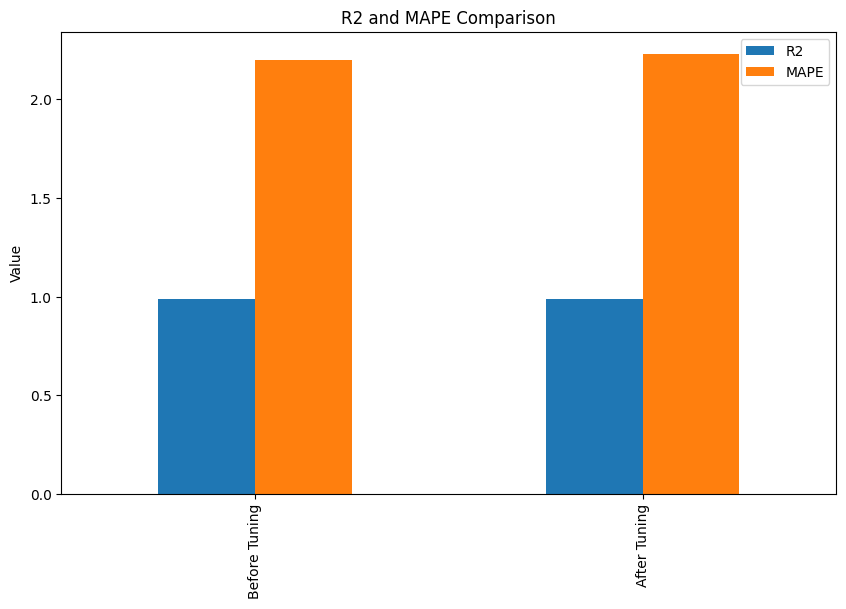

In [266]:
import matplotlib.pyplot as plt

# Combine metrics into one DF for plotting
metrics_plot_df = pd.DataFrame([before_tuning, after_tuning], index=['Before Tuning', 'After Tuning'])

metrics_plot_df[['MAE','MSE','RMSE']].plot(kind='bar', figsize=(10,6), title='Error Metrics Comparison')
plt.ylabel('Value')
plt.show()

metrics_plot_df[['R2','MAPE']].plot(kind='bar', figsize=(10,6), title='R2 and MAPE Comparison')
plt.ylabel('Value')
plt.show()